In [0]:
from sklearn import datasets
data = datasets.load_breast_cancer()

In [2]:
data.data.shape

(569, 30)

In [0]:
data.feature_names

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [0]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(random_state=42)

In [8]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [9]:
dtc.score(X_train, y_train)

1.0

In [10]:
dtc.score(X_test, y_test)

0.9473684210526315

In [0]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(dtc, out_file=f,
                             feature_names=data.feature_names,
                             class_names=data.target_names)

In [0]:
import numpy as np
max_depths = np.array([1, 2, 3, 5, 7, 9, 11])

In [0]:
train_score = []
test_score = []
for d in max_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=d, random_state=42)
    dtc.fit(X_train, y_train)
    train_score.append(dtc.score(X_train, y_train))
    test_score.append(dtc.score(X_test, y_test))

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

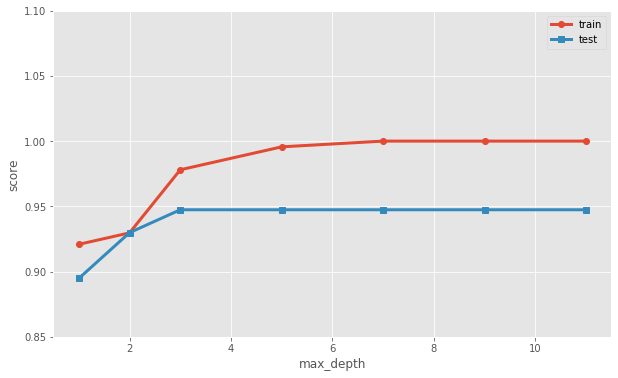

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.ylim(0.85, 1.1)
plt.legend()

In [0]:
train_score = []
test_score = []
min_samples = np.array([2, 4, 8, 16, 32])
for s in min_samples:
    dtc = tree.DecisionTreeClassifier(min_samples_leaf=s, random_state=42)
    dtc.fit(X_train, y_train)
    train_score.append(dtc.score(X_train, y_train))
    test_score.append(dtc.score(X_test, y_test))

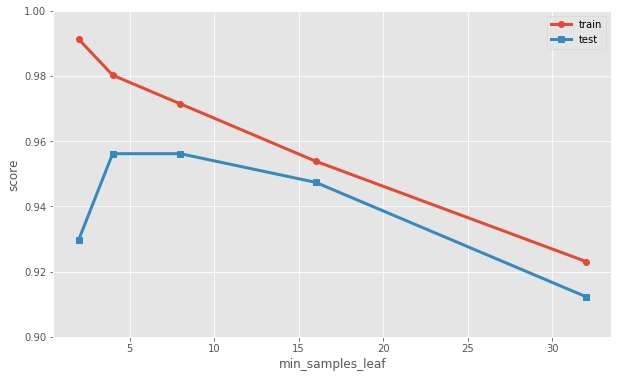

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(min_samples, train_score, 'o-', linewidth=3, label='train')
plt.plot(min_samples, test_score, 's-', linewidth=3, label='test')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.ylim(0.9, 1)
plt.legend()